In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000) # Setting pandas dataframe display width to N
from scipy import stats # statistical library
from statsmodels.stats.weightstats import ztest # statistical library for hypothesis testing
import plotly.graph_objs as go # interactive plotting library
import plotly.express as px # interactive plotting library
import matplotlib.pyplot as plt # plotting library
import pandas_profiling # library for automatic EDA
%pip install autoviz # installing and importing autoviz, another library for automatic data visualization
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import display # display from IPython.display
from itertools import cycle # function used for cycling over values
%pip install ppscore # installing ppscore, library used to check non-linear relationships between our variables
import ppscore as pps # importing ppscore

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


df = pd.read_csv("train.csv")

display(df.head(10))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 2.201


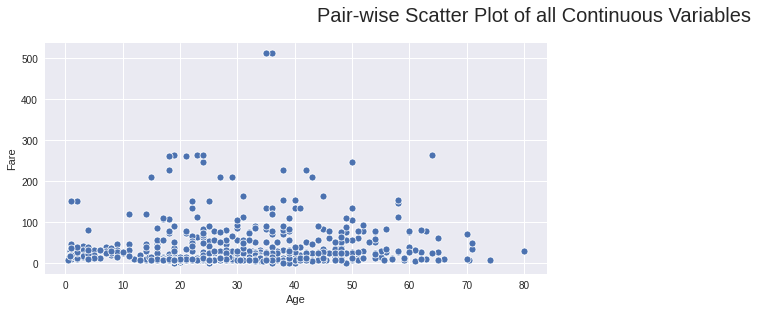

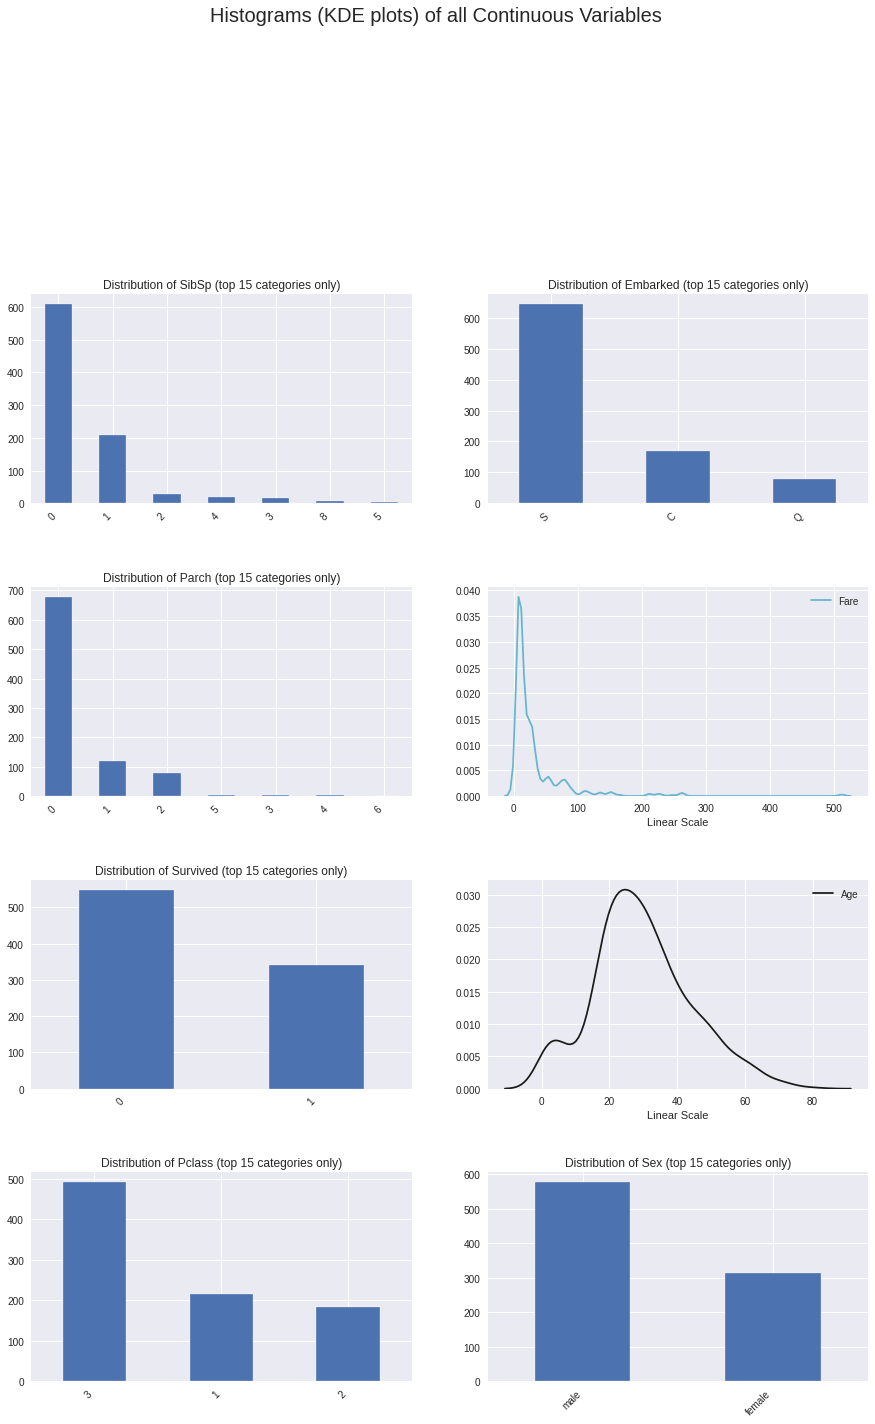

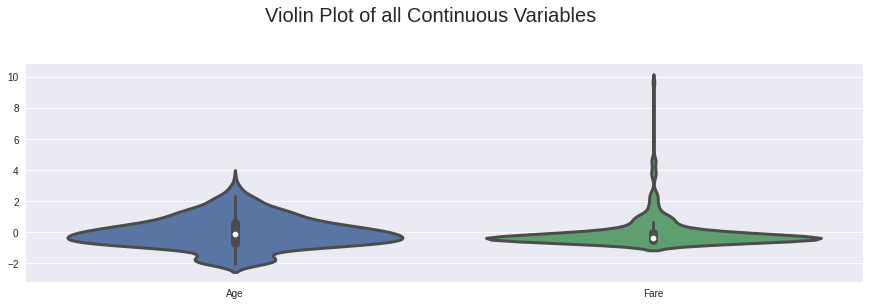

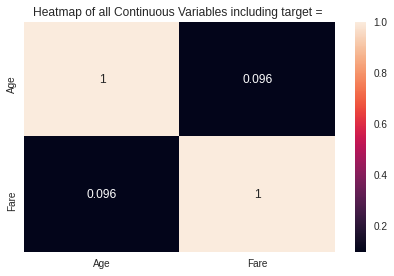

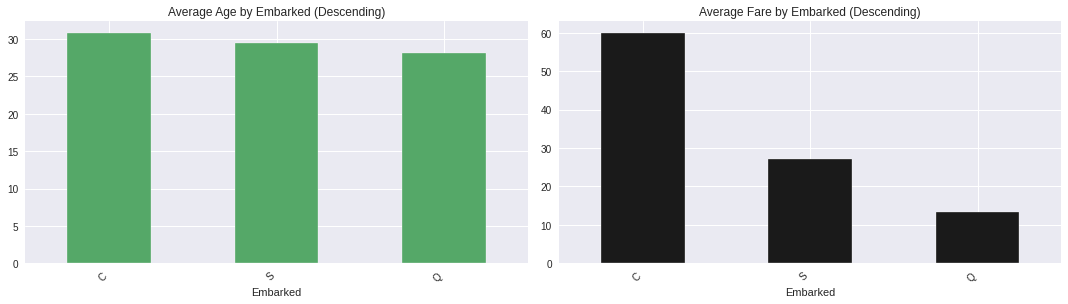

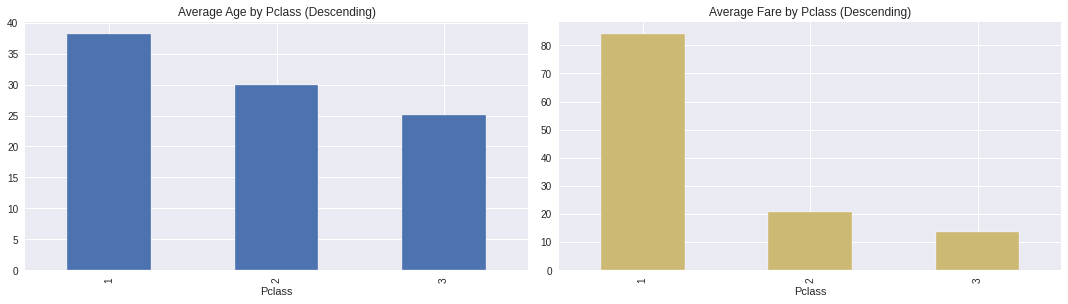

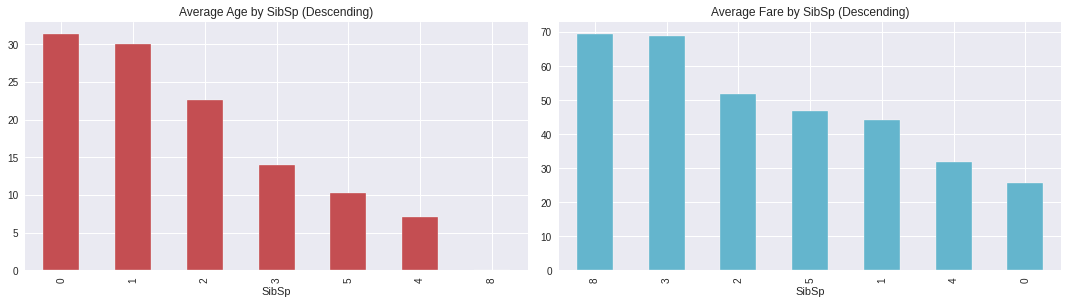

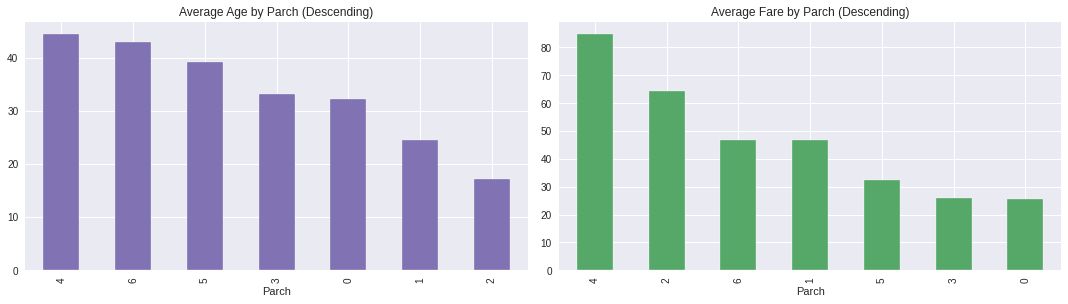

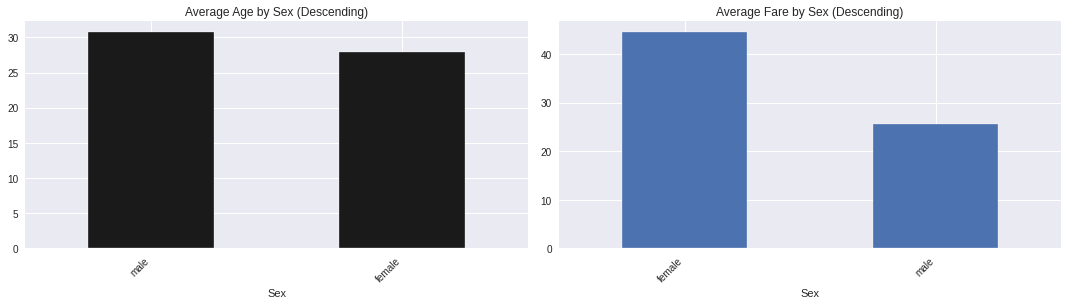

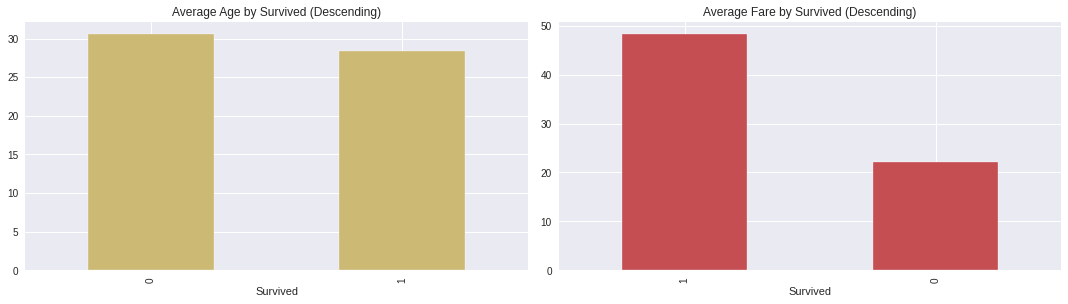

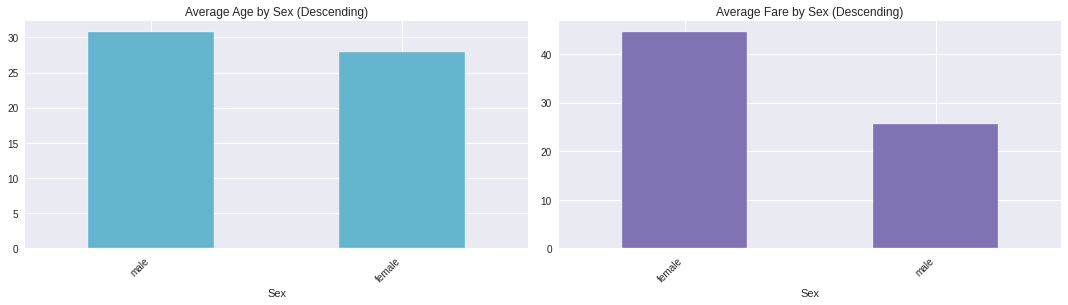

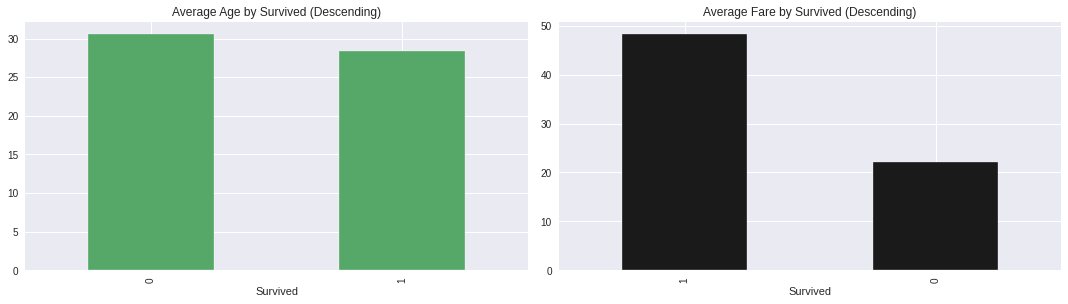

In [4]:
AV = AutoViz_Class()

# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz("train.csv")

In [5]:
df_survivors = df[df['Survived'] == 1]
df_nonsurvivors = df[df['Survived'] == 0]

In [6]:
violin_survivors = go.Violin(
    y=df_survivors['Age'],
    x=df_survivors['Survived'],
    name='Survivors',
    marker_color='forestgreen',
    box_visible=True)

violin_nonsurvivors = go.Violin(
    y=df_nonsurvivors['Age'],
    x=df_nonsurvivors['Survived'],
    name='Non-Survivors',
    marker_color='darkred',
    box_visible=True)

data = [violin_nonsurvivors, violin_survivors]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Age" of survivors vs Ages of non-survivors',
  xaxis=dict(
        title='Survived or not'
    ),
    yaxis=dict(
        title='Age'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [7]:
dist_a = df_survivors['Age'].dropna()

# Second distribution for the hypothesis test: Ages of non-survivors
dist_b = df_nonsurvivors['Age'].dropna()
t_stat, p_value = ztest(dist_a, dist_b)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat))
print("P value = " + str(p_value)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (ages of survivors vs ages of non-survivors) are statistically different
t_stat_2, p_value_2 = stats.ttest_ind(dist_a, dist_b)
print("----- T Test Results -----")
print("T stat. = " + str(t_stat_2))
print("P value = " + str(p_value_2)) # P-value is less than 0.05

----- Z Test Results -----
T stat. = -2.06668694625381
P value = 0.03876366199189209

----- T Test Results -----
T stat. = -2.06668694625381
P value = 0.03912465401348249


In [8]:
df_survivors_sex = df_survivors['Sex'].value_counts()
df_survivors_sex = pd.DataFrame({'Sex':df_survivors_sex.index, 'count':df_survivors_sex.values})

# Taking the count of each Sex value inside the Survivors
df_nonsurvivors_sex = df_nonsurvivors['Sex'].value_counts()
df_nonsurvivors_sex = pd.DataFrame({'Sex':df_nonsurvivors_sex.index, 'count':df_nonsurvivors_sex.values})


# Creating the plotting objects
pie_survivors_sex = go.Pie(  
   labels = df_survivors_sex['Sex'],
   values = df_survivors_sex['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['violet', 'cornflowerblue'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_sex = go.Pie(  
   labels = df_nonsurvivors_sex['Sex'],
   values = df_nonsurvivors_sex['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['cornflowerblue', 'violet'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_sex, pie_nonsurvivors_sex]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Sex" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.85, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [9]:
df_survivors_pclass = df_survivors['Pclass'].value_counts()
df_survivors_pclass = pd.DataFrame({'Pclass':df_survivors_pclass.index, 'count':df_survivors_pclass.values})

# Taking the count of each Pclass value inside the Survivors
df_nonsurvivors_pclass = df_nonsurvivors['Pclass'].value_counts()
df_nonsurvivors_pclass = pd.DataFrame({'Pclass':df_nonsurvivors_pclass.index, 'count':df_nonsurvivors_pclass.values})


# Creating the plotting objects
pie_survivors_pclass = go.Pie(  
   labels = df_survivors_pclass['Pclass'],
   values = df_survivors_pclass['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['#636EFA', '#EF553B', '#00CC96'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_pclass = go.Pie(  
   labels = df_nonsurvivors_pclass['Pclass'],
   values = df_nonsurvivors_pclass['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['#EF553B', '#00CC96', '#636EFA'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_pclass, pie_nonsurvivors_pclass]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Pclass" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.18, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.85, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [10]:
fare_survivors_box = go.Box(  
   x=df_survivors['Fare'],
   name='Survivors',
   marker=dict(color='navy')
)

fare_nonsurvivors_box = go.Box(  
   x=df_nonsurvivors['Fare'],
   name='Non-Survivors',
   marker=dict(color='steelblue')
)
  
data = [fare_nonsurvivors_box, fare_survivors_box]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Fare" value of survivors vs "Fare" value of non-survivors',
    barmode='stack',
    xaxis=dict(
        title='Fare distribution'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [11]:
dist_c = df_survivors['Fare'].dropna()

# Fourth distribution for the hypothesis test - Fares of non-survivors
dist_d = df_nonsurvivors['Fare'].dropna()
t_stat_3, p_value_3 = ztest(dist_c, dist_d)
print("----- Z Test Results -----")
print("T stat. = " + str(t_stat_3))
print("P value = " + str(p_value_3)) # P-value is less than 0.05

print("")

# T-test: Checking if the distribution means (fares of survivors vs fares of non-survivors) are statistically different
t_stat_4, p_value_4 = stats.ttest_ind(dist_c, dist_d)
print("----- T Test Results -----")
print("T stat. = " + str(t_stat_4))
print("P value = " + str(p_value_4)) # P-value is less than 0.05

----- Z Test Results -----
T stat. = 7.939191660871055
P value = 2.035031103573989e-15

----- T Test Results -----
T stat. = 7.939191660871055
P value = 6.120189341924198e-15


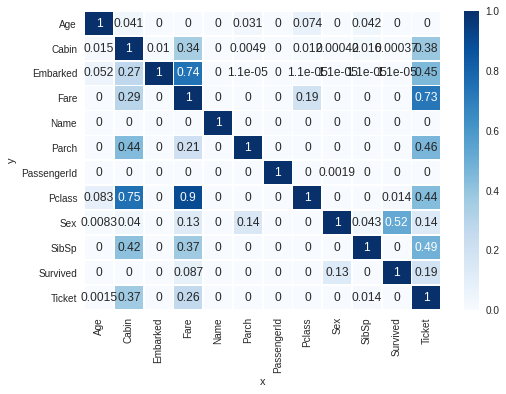

In [12]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.75, annot=True)

In [13]:
import collections
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
%pip install category_encoders
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm

     |████████████████████████████████| 81kB 4.6MB/s 


In [14]:
df['AgeCat'] = ''
df['AgeCat'].loc[(df['Age'] < 18)] = 'young'
df['AgeCat'].loc[(df['Age'] >= 18) & (df['Age'] < 56)] = 'mature'
df['AgeCat'].loc[(df['Age'] >= 56)] = 'senior'


# Creating a categorical variable for Family Sizes
df['FamilySize'] = ''
df['FamilySize'].loc[(df['SibSp'] <= 2)] = 'small'
df['FamilySize'].loc[(df['SibSp'] > 2) & (df['SibSp'] <= 5 )] = 'medium'
df['FamilySize'].loc[(df['SibSp'] > 5)] = 'large'


# Creating a categorical variable to tell if the passenger is alone
df['IsAlone'] = ''
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) > 0)] = 'no'
df['IsAlone'].loc[((df['SibSp'] + df['Parch']) == 0)] = 'yes'


# Creating a categorical variable to tell if the passenger is a Young/Mature/Senior male or a Young/Mature/Senior female
df['SexCat'] = ''
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] <= 21)] = 'youngmale'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 21) & (df['Age']) < 50] = 'maturemale'
df['SexCat'].loc[(df['Sex'] == 'male') & (df['Age'] > 50)] = 'maturemale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] <= 21)] = 'youngfemale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 21) & (df['Age']) < 50] = 'maturefemale'
df['SexCat'].loc[(df['Sex'] == 'female') & (df['Age'] > 50)] = 'maturefemale'


# Taking another look at the data
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FamilySize,IsAlone,SexCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mature,small,no,maturefemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mature,small,no,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,mature,small,yes,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mature,small,no,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mature,small,yes,maturefemale
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,,small,yes,maturefemale
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,mature,small,yes,maturefemale
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,young,medium,no,maturefemale
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,mature,small,no,maturefemale
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,young,small,no,maturefemale


In [15]:
def get_feature_names(df):
    # Splitting the target
    target = df['Survived']

    # Dropping unused columns from the feature set
    df.drop(['PassengerId', 'Survived', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

    # Splitting categorical and numerical column dataframes
    categorical_df = df.select_dtypes(include=['object'])
    numeric_df = df.select_dtypes(exclude=['object'])

    # And then, storing the names of categorical and numerical columns.
    categorical_columns = list(categorical_df.columns)
    numeric_columns = list(numeric_df.columns)
    
    print("Categorical columns:\n", categorical_columns)
    print("\nNumeric columns:\n", numeric_columns)

    return target, categorical_columns, numeric_columns

target, categorical_columns, numeric_columns = get_feature_names(df)

Categorical columns:
 ['Sex', 'Embarked', 'AgeCat', 'FamilySize', 'IsAlone', 'SexCat']

Numeric columns:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [16]:
def balancingClassesRus(x_train, y_train):
    
    # Using RandomUnderSampler to balance our training data points
    rus = RandomUnderSampler(random_state=7)
    features_balanced, target_balanced = rus.fit_resample(x_train, y_train)
    
    print("Count for each class value after RandomUnderSampler:", collections.Counter(target_balanced))
    
    return features_balanced, target_balanced


def balancingClassesSmoteenn(x_train, y_train):
    
    # Using SMOTEEN to balance our training data points
    smn = SMOTEENN(random_state=7)
    features_balanced, target_balanced = smn.fit_resample(x_train, y_train)
    
    print("Count for each class value after SMOTEEN:", collections.Counter(target_balanced))
    
    return features_balanced, target_balanced


def balancingClassesSmote(x_train, y_train):

    # Using SMOTE to to balance our training data points
    sm = SMOTE(random_state=7)
    features_balanced, target_balanced = sm.fit_resample(x_train, y_train)

    print("Count for each class value after SMOTE:", collections.Counter(target_balanced))

    return features_balanced, target_balanced

In [17]:
def testSetResultsClassifier(classifier, x_test, y_test):
    predictions = classifier.predict(x_test)
    
    results = []
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    
    results.append(f1)
    results.append(precision)
    results.append(recall)
    results.append(roc_auc)
    results.append(accuracy)
    
    print("\n\n#---------------- Test set results (Best Classifier) ----------------#\n")
    print("F1 score, Precision, Recall, ROC_AUC score, Accuracy:")
    print(results)
    
    return results

In [18]:
def defineBestModelPipeline(df, target, categorical_columns, numeric_columns):
    
    # Splitting original data into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.1, random_state=42)
    y_train = y_train.to_numpy() # Transforming training targets into numpy arrays
    y_test = y_test.to_numpy() # Transforming test targets into numpy arrays
    
    
    # # If desired, we can balance training classes using one of the functions below
    # # Obtaining balanced data for modeling using Random Under Sampling
    #x_train, y_train = balancingClassesRus(x_train, y_train)

    # # Obtaining balanced data for modeling using SMOTEENN
    #x_train, y_train = balancingClassesSmoteenn(x_train, y_train)

    # # Obtaining balanced data for modeling using SMOTE
    #x_train, y_train = balancingClassesSmote(x_train, y_train)
    
    
    
    # 1st -> Numeric Transformers
    # Here, we are creating different several different data transformation pipelines 
    # to be applied in our numeric features
    numeric_transformer_1 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=7)),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_2 = Pipeline(steps=[('imp', IterativeImputer(max_iter=30, random_state=49)),
                                            ('scaler', StandardScaler())])
    
    numeric_transformer_3 = Pipeline(steps=[('imp', SimpleImputer(strategy='mean')),
                                            ('scaler', MinMaxScaler())])
    
    numeric_transformer_4 = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    
    
    # 2nd -> Categorical Transformer
    # Despite my option of not doing it, you can also choose to create different 
    # data transformation pipelines for your categorical features.
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    
    
    # 3rd -> Combining both numerical and categorical pipelines
    # Here, we are creating different ColumnTransformers, each one with a different numerical transformation
    data_transformations_1 = ColumnTransformer(transformers=[('num', numeric_transformer_1, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_2 = ColumnTransformer(transformers=[('num', numeric_transformer_2, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_3 = ColumnTransformer(transformers=[('num', numeric_transformer_3, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    data_transformations_4 = ColumnTransformer(transformers=[('num', numeric_transformer_4, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    
    
    
    # And finally, we are going to apply these different data transformations to RandomSearchCV,
    # trying to find the best imputing strategy, the best feature engineering strategy
    # and the best model with it's parameters.
    # Below, we just need to initialize a Pipeline object with any transformations we want.
    pipe = Pipeline(steps=[('data_transformations', data_transformations_1), # Initializing data transformation step by choosing any of the above
                           ('feature_eng', PCA()), # Initializing feature engineering step by choosing any desired method
                           ('clf', SVC())]) # Initializing modeling step of the pipeline with any model object
                           #memory='cache_folder') -> Used to optimize memory when needed
    
    
    
    # Now, we define the grid of parameters that RandomSearchCV will use. It will randomly chose
    # options for each step inside the dictionaries ('data transformations', 'feature_eng', 'clf'
    # and 'clf parameters'. In the end of it's iterations, RandomSearchCV it will return the best 
    # found options.
    params_grid = [
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [KNeighborsClassifier()],
                     'clf__n_neighbors': stats.randint(1, 30),
                     'clf__metric': ['minkowski', 'euclidean']},

        

                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LogisticRegression()],
                     'clf__penalty': ['l1', 'l2'],
                     'clf__C': stats.uniform(0.01, 10)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [SVC()],
                     'clf__C': stats.uniform(0.01, 1),
                     'clf__gamma': stats.uniform(0.01, 1)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [DecisionTreeClassifier()],
                     'clf__criterion': ['gini', 'entropy'],
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [RandomForestClassifier()],
                     'clf__n_estimators': stats.randint(10, 175),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 5)]},
        
                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [ExtraTreesClassifier()],
                     'clf__n_estimators': stats.randint(10, 150),
                     'clf__max_features': [None, "auto", "log2"],
                     'clf__max_depth': [None, stats.randint(1, 6)]},

                    
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [GradientBoostingClassifier()],
                     'clf__n_estimators': stats.randint(10, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': [None, stats.randint(1, 6)]},

        
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [LGBMClassifier()],
                     'clf__n_estimators': stats.randint(1, 100),
                     'clf__learning_rate': stats.uniform(0.01, 0.7),
                     'clf__max_depth': [None, stats.randint(1, 6)]},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [XGBClassifier()],
                     'clf__n_estimators': stats.randint(5, 125),
                     'clf__eta': stats.uniform(0.01, 1),
                     'clf__max_depth': [None, stats.randint(1, 6)],
                     'clf__gamma': stats.uniform(0.01, 1)},


        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [StackingClassifier(estimators=[('svc', SVC(C=1, gamma=1)),
                                                            ('rf', RandomForestClassifier(max_depth=7, max_features=None, n_estimators=60, n_jobs=-1)),
                                                            ('xgb', XGBClassifier(eta=0.6, gamma=0.7, max_depth=None, n_estimators=30))], 
                                                final_estimator=LogisticRegression(C=1))]},
   
   
        
                    {'data_transformations': [data_transformations_1, data_transformations_2, data_transformations_3, data_transformations_4],
                     'feature_eng': [None, 
                                     PCA(n_components=round(x_train.shape[1]*0.95)),
                                     PCA(n_components=round(x_train.shape[1]*0.9)),
                                     PCA(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.85)),
                                     TSNE(n_components=round(x_train.shape[1]*0.8)), 
                                     TSNE(n_components=round(x_train.shape[1]*0.75)),
                                     PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
                     'clf': [VotingClassifier(estimators=[('gbt', GradientBoostingClassifier(learning_rate=0.8, max_depth=None, n_estimators=18)),
                                                          ('lgbm', LGBMClassifier(n_estimators=30, learning_rate=0.6, max_depth=None)),
                                                          ('xgb', XGBClassifier(eta=0.55, gamma=0.75, max_depth=None, n_estimators=35))],
                                              voting='soft')]}
                ]
    
    
    # Now, we fit a RandomSearchCV to search over the grid of parameters defined above
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    best_model_pipeline = RandomizedSearchCV(pipe, params_grid, n_iter=500, 
                                             scoring=metrics, refit='accuracy', 
                                             n_jobs=-1, cv=5, random_state=42)

    best_model_pipeline.fit(x_train, y_train)
    
    
    # At last, we check the final results
    print("\n\n#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[0])
    print("\n\n#---------------- Best Feature Engineering technique found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[1])
    print("\n\n#---------------- Best Classifier found in RandomSearchCV  ----------------#\n\n", best_model_pipeline.best_estimator_[2])
    print("\n\n#---------------- Best Estimator's average Accuracy Score on CV (validation set) ----------------#\n\n", best_model_pipeline.best_score_)
    
    return x_train, x_test, y_train, y_test, best_model_pipeline

In [19]:
x_train, x_test, y_train, y_test, best_model_pipeline = defineBestModelPipeline(df, target, categorical_columns, numeric_columns)


# Checking best model's performance on test data
test_set_results = testSetResultsClassifier(best_model_pipeline, x_test, y_test)



#---------------- Best Data Pipeline found in RandomSearchCV  ----------------#

 ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imp',
                                                  IterativeImputer(add_indicator=False,
                                                                   estimator=None,
                                                                   imputation_order='ascending',
                                                                   initial_strategy='mean',
                                                                   max_iter=30,
                                                                   max_value=None,
                                                                   min_value=None,
                                           

In [20]:
df_results = pd.DataFrame(best_model_pipeline.cv_results_)

display(df_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__learning_rate,param_clf__max_depth,param_clf__n_estimators,param_data_transformations,param_feature_eng,param_clf__max_features,param_clf__metric,param_clf__n_neighbors,param_clf__C,param_clf__gamma,param_clf__penalty,param_clf__criterion,param_clf__eta,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.002919,0.000298,0.000000,0.000000,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.56758,None,81,"ColumnTransformer(n_jobs=None, remainder='drop...","TSNE(angle=0.5, early_exaggeration=12.0, init=...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'clf': GradientBoostingClassifier(ccp_alpha=0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210
1,0.935896,0.051098,0.082077,0.004839,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.322083,None,84,"ColumnTransformer(n_jobs=None, remainder='drop...","PolynomialFeatures(degree=1, include_bias=True...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'clf': GradientBoostingClassifier(ccp_alpha=0...,0.782609,0.75000,0.79375,0.75000,0.76250,0.767772,0.017632,104,0.728814,0.684211,0.759259,0.656716,0.688525,0.703505,0.036152,105,0.693548,0.639344,0.672131,0.721311,0.688525,0.682972,0.026957,82,0.710744,0.661017,0.713043,0.687500,0.688525,0.692166,0.018901,104,0.856468,0.778771,0.848485,0.823895,0.823812,0.826286,0.027104,95
2,0.286206,0.008317,0.000000,0.000000,"RandomForestClassifier(bootstrap=True, ccp_alp...",NaN,<scipy.stats._distn_infrastructure.rv_frozen o...,159,"ColumnTransformer(n_jobs=None, remainder='drop...","PCA(copy=True, iterated_power='auto', n_compon...",log2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'clf': RandomForestClassifier(bootstrap=True,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374
3,0.003120,0.000792,0.000000,0.000000,"LGBMClassifier(boosting_type='gbdt', class_wei...",0.59271,<scipy.stats._distn_infrastructure.rv_frozen o...,2,"ColumnTransformer(n_jobs=None, remainder='drop...","TSNE(angle=0.5, early_exaggeration=12.0, init=...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'clf': LGBMClassifier(boosting_type='gbdt', c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373
4,0.191395,0.009519,0.200516,0.007967,"KNeighborsClassifier(algorithm='auto', leaf_si...",NaN,NaN,NaN,"ColumnTransformer(n_jobs=None, remainder='drop...","PolynomialFeatures(degree=2, include_bias=True...",NaN,euclidean,26,NaN,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.788820,0.76875,0.83125,0.79375,0.78750,0.794014,0.020466,66,0.791667,0.730769,0.854167,0.759259,0.813953,0.789963,0.042772,46,0.612903,0.622951,0.672131,0.672131,0.573770,0.630777,0.037552,147,0.690909,0.672566,0.752294,0.713043,0.673077,0.700378,0.029880,87,0.871131,0.810399,0.890462,0.812138,0.860242,0.848874,0.032199,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [21]:
display(df_results[df_results['rank_test_accuracy'] == 1])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__learning_rate,param_clf__max_depth,param_clf__n_estimators,param_data_transformations,param_feature_eng,param_clf__max_features,param_clf__metric,param_clf__n_neighbors,param_clf__C,param_clf__gamma,param_clf__penalty,param_clf__criterion,param_clf__eta,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
95,0.175388,0.005963,0.07680,0.002746,"SVC(C=0.5131362585800877, break_ties=False, ca...",NaN,NaN,NaN,"ColumnTransformer(n_jobs=None, remainder='drop...","PCA(copy=True, iterated_power='auto', n_compon...",NaN,NaN,NaN,0.513136,0.86649,NaN,NaN,NaN,"{'clf': SVC(C=0.5131362585800877, break_ties=F...",0.832298,0.79375,0.86875,0.79375,0.84375,0.82646,0.029194,1,0.857143,0.780000,0.954545,0.78,0.846154,0.843568,0.064170,14,0.677419,0.639344,0.688525,0.639344,0.721311,0.673189,0.031176,97,0.756757,0.702703,0.800000,0.702703,0.778761,0.748185,0.039574,4,0.858097,0.764862,0.877463,0.811475,0.858586,0.834097,0.040894,79
175,0.166918,0.003261,0.08753,0.005410,"KNeighborsClassifier(algorithm='auto', leaf_si...",NaN,NaN,NaN,"ColumnTransformer(n_jobs=None, remainder='drop...","PCA(copy=True, iterated_power='auto', n_compon...",NaN,minkowski,20,NaN,NaN,NaN,NaN,NaN,"{'clf': KNeighborsClassifier(algorithm='auto',...",0.832298,0.78750,0.88750,0.79375,0.83125,0.82646,0.035695,1,0.857143,0.787234,0.957447,0.78,0.886364,0.853637,0.065866,11,0.677419,0.606557,0.737705,0.639344,0.639344,0.660074,0.044835,121,0.756757,0.685185,0.833333,0.702703,0.742857,0.744167,0.051593,8,0.884979,0.800629,0.908925,0.819672,0.874483,0.857738,0.040873,6


In [22]:
categorical_features_after_onehot = best_model_pipeline.best_estimator_.named_steps['data_transformations']\
                                        .transformers_[1][1].named_steps['onehot'].get_feature_names()

feature_names_in_order = numeric_columns + categorical_features_after_onehot

print(feature_names_in_order)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', '0_male', '0_female', '1_S', '1_Q', '1_C', '2_young', '2_senior', '2_', '2_mature', '3_small', '3_medium', '3_large', '4_no', '4_yes', '5_maturefemale']


In [23]:
# Defining a PCA Pipeline
def definePCAPipeline(categorical_columns, numeric_columns):

    # 1st -> Numeric Transformer
    numeric_transformer = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    
    
    # 2nd -> Categorical Transformer
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    
    
    # 3rd -> Combining both numerical and categorical pipelines
    data_transformations = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    

    # 4th -> Final PCA Pipeline
    pca_pipeline = Pipeline(steps=[('data_transformations', data_transformations),
                           ('feature_eng', PCA(n_components=2, whiten=True))])
    
    
    return pca_pipeline

In [24]:
pca_pipeline = definePCAPipeline(categorical_columns, numeric_columns)
pca_arr = pca_pipeline.fit_transform(df)

# How much variance does our PCA obtained components explains from the original variance in data?
comp1 = pca_pipeline[1].explained_variance_ratio_[0]
comp2 = pca_pipeline[1].explained_variance_ratio_[1]
exp_variance_pca = comp1 + comp2

print("Compontent 1 explained variance ratio:", comp1)
print("Compontent 2 explained variance ratio:", comp2)
print("Total explained variance ratio obtained from both components:", exp_variance_pca)

Compontent 1 explained variance ratio: 0.28527505648245377
Compontent 2 explained variance ratio: 0.25117588567753973
Total explained variance ratio obtained from both components: 0.5364509421599934


In [25]:
pca_df = pd.DataFrame(pca_arr, columns=["PC1", "PC2"])
pca_df['Survived'] = target

pca_df.head(10)

,PC1,PC2,Survived
0,0.081220,-0.826740,0
1,0.433410,1.485768,1
2,-0.549446,-0.580048,1
3,0.379890,1.157665,1
4,-0.843766,-0.412802,0
5,-0.723143,-0.696806,0
6,-0.805780,1.641656,0
7,1.875080,-1.662708,0
8,0.810367,-0.559571,1
9,0.662209,-0.216655,1


In [26]:
pca_df_survivors = pca_df[pca_df['Survived'] == 1]
pca_df_nonsurvivors = pca_df[pca_df['Survived'] == 0]


# Visualizing the two-dimensional dataset
scatter_obj_survs = go.Scatter(x=pca_df_survivors['PC1'],
                               y=pca_df_survivors['PC2'],
                               mode="markers",
                               name='Survivors',
                               marker=dict(color='forestgreen'))


scatter_obj_nonsurvs = go.Scatter(x=pca_df_nonsurvivors['PC1'],
                                  y=pca_df_nonsurvivors['PC2'],
                                  mode="markers",
                                  name='Non-survivors',
                                  marker=dict(color='darkred'))


data = [scatter_obj_survs, scatter_obj_nonsurvs]


# Plot's Layout (background color, title, etc.)
layout = go.Layout(title='2-Dimensional visualization of survivors and non-survivors',
                   xaxis=dict(title='PC1'), yaxis=dict(title='PC2'))

fig = go.Figure(data=data, layout=layout)
fig.show()

In [27]:
def defineTSNEPipeline(categorical_columns, numeric_columns):

    # 1st -> Numeric Transformer
    numeric_transformer = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    
    
    # 2nd -> Categorical Transformer
    categorical_transformer = Pipeline(steps=[('frequent', SimpleImputer(strategy='most_frequent')),
                                              ('onehot', OneHotEncoder(use_cat_names=True))])
    
    
    # 3rd -> Combining both numerical and categorical pipelines
    data_transformations = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_columns),
                                                             ('cat', categorical_transformer, categorical_columns)])
    

    # 4th -> Final t-SNE Pipeline
    tsne_pipeline = Pipeline(steps=[('data_transformations', data_transformations),
                                    ('feature_eng', TSNE(n_components=2, random_state=1))])
    
    
    return tsne_pipeline

In [28]:
tsne_pipeline = defineTSNEPipeline(categorical_columns, numeric_columns)
tsne_arr = tsne_pipeline.fit_transform(df)

In [29]:
tsne_df = pd.DataFrame(tsne_arr, columns=["tsne_dim1", "tsne_dim2"])
tsne_df['Survived'] = target

tsne_df.head(10)

,tsne_dim1,tsne_dim2,Survived
0,-19.119854,3.232608,0
1,-2.384545,20.024231,1
2,7.298310,-12.062561,1
3,-2.704644,16.967587,1
4,35.398392,-10.910491,0
5,-13.003528,-16.556015,0
6,19.151060,16.935246,0
7,-38.522064,-5.514462,0
8,-21.462759,14.744230,1
9,-28.522161,1.301882,1


In [30]:
tsne_df_survivors = tsne_df[tsne_df['Survived'] == 1]
tsne_df_nonsurvivors = tsne_df[tsne_df['Survived'] == 0]


# Visualizing the two-dimensional dataset
scatter_obj_survs_tsne = go.Scatter(x=tsne_df_survivors['tsne_dim1'],
                                    y=tsne_df_survivors['tsne_dim2'],
                                    mode="markers",
                                    name='Survivors',
                                    marker=dict(color='forestgreen'))


scatter_obj_nonsurvs_tsne = go.Scatter(x=tsne_df_nonsurvivors['tsne_dim1'],
                                       y=tsne_df_nonsurvivors['tsne_dim2'],
                                       mode="markers",
                                       name='Non-survivors',
                                       marker=dict(color='darkred'))


data_tsne = [scatter_obj_survs_tsne, scatter_obj_nonsurvs_tsne]


# Plot's Layout (background color, title, etc.)
layout_tsne = go.Layout(title='2-Dimensional visualization of survivors and non-survivors (t-SNE algorithm)',
                        xaxis=dict(title='tsne_dim1'), yaxis=dict(title='tsne_dim2'))

fig_tsne = go.Figure(data=data_tsne, layout=layout_tsne)
fig_tsne.show()

In [32]:
df_test = pd.read_csv("test.csv")

# Dropping unnecessary columns
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [33]:
df_test['AgeCat'] = ''
df_test['AgeCat'].loc[(df_test['Age'] < 18)] = 'young'
df_test['AgeCat'].loc[(df_test['Age'] >= 18) & (df_test['Age'] < 56)] = 'mature'
df_test['AgeCat'].loc[(df_test['Age'] >= 56)] = 'senior'


# Creating a categorical variable for Family Sizes
df_test['FamilySize'] = ''
df_test['FamilySize'].loc[(df_test['SibSp'] <= 2)] = 'small'
df_test['FamilySize'].loc[(df_test['SibSp'] > 2) & (df_test['SibSp'] <= 5 )] = 'medium'
df_test['FamilySize'].loc[(df_test['SibSp'] > 5)] = 'large'


# Creating a categorical variable to tell if the passenger is alone
df_test['IsAlone'] = ''
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) > 0)] = 'no'
df_test['IsAlone'].loc[((df_test['SibSp'] + df_test['Parch']) == 0)] = 'yes'


# Creating a categorical variable to tell if the passenger is a Young/Mature/Senior male or a Young/Mature/Senior female
df_test['SexCat'] = ''
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] <= 21)] = 'youngmale'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 21) & (df_test['Age']) < 50] = 'maturemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'male') & (df_test['Age'] > 50)] = 'maturemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] <= 21)] = 'youngfemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 21) & (df_test['Age']) < 50] = 'maturefemale'
df_test['SexCat'].loc[(df_test['Sex'] == 'female') & (df_test['Age'] > 50)] = 'maturefemale'


# Applying best_model_pipeline:
# Step 1 -> Transforming data the same way we did in the training set;
# Step 2 -> making predictions using the best model obtained by RandomSearchCV.
test_predictions = best_model_pipeline.predict(df_test)
print(test_predictions)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [34]:
df_submission = pd.read_csv("test.csv")

df_submission['Survived'] = test_predictions # Adding a column with predicted values

df_submission.drop(df_submission.columns.difference(['PassengerId', 'Survived']), axis=1, inplace=True) # Selecting only needed columns

df_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
